<a href="https://colab.research.google.com/github/alemnew97de/Project1-Text-data-Analysis-Youtube_case-Study-/blob/main/youtube_analysis_Alemn_ew_singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






## Project1: Text data Analysis(Youtube_case Study)
Steps to  be followed to load a data and summarized the analysis;

1. How to read csv data or how to load data
2. Perform Sentiment Analysis
3. Wordcloud Analysis of your data
4. Perform Emoji's Analysis
5. Collect Entire data of Youtube !
6. How to export your data into (csv, json, db)
7. Which Category has the maximum likes ?
8. Find out whether audience is engaged or not
9. Which channels have the largest number of trending videos?
10. Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

1. How to read csv data or how to load data

In [ ]:
### lets import all the necessary packages !

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
comments = pd.read_csv('/content/UScomments.csv', delimiter=',', error_bad_lines=False)

<ipython-input-4-0ead59ea196a>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv('/content/UScomments.csv', delimiter=',', error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

<ipython-input-4-0ead59ea196a>:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('/content/UScomments.csv', delimiter=',', error_bad_lines=False)


In [ ]:
### above is a warning , u can ignore that ..

In [5]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [6]:
## lets find out missing values in your data
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [7]:
## drop missing values as we have very few & lets update dataframe as well..
comments.dropna(inplace=True)

In [9]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 2. Perform Sentiment Analysis
    
    In short , Sentiment analysis is all about analyszing sentiments of Users

In [11]:
!pip install textblob
### lets perform sentiment analysis using TextBlob which is a NLP library built on top of NLTK )..

In [ ]:
## if you are getting error in textblob while installing using pip ..
## you can install textblob using conda in Anaconda prompt

## conda install -c conda-forge textblob

In [12]:
from textblob import TextBlob

In [13]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [14]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

### its a neutral sentence !

0.0

In [15]:
comments.shape

(691375, 4)

In [16]:
## for those of you who dont have good specifications , considering sample of data is a good option !

sample_df = comments[0:1000]

In [17]:
sample_df.shape

(1000, 4)

In [18]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [19]:
len(polarity)

691375

In [20]:
comments['polarity']  = polarity

### Inserting polarity values into comments dataframe while defining feature name as "polarity"

In [21]:
comments.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## 3..  Wordcloud Analysis of your data

In [ ]:
### Lets perform EDA for the highly Positve sentences ie Polarity value will be 1

In [22]:
filter1 = comments['polarity']==1

In [23]:
comments_positive = comments[filter1]

In [24]:
filter2 = comments['polarity']==-1

In [25]:
comments_negative = comments[filter2]

In [26]:
comments_positive.head(5)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [27]:
!pip install wordcloud

In [29]:
from wordcloud import WordCloud , STOPWORDS

In [31]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [32]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [33]:
type(comments['comment_text'])

pandas.core.series.Series

In [35]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [36]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

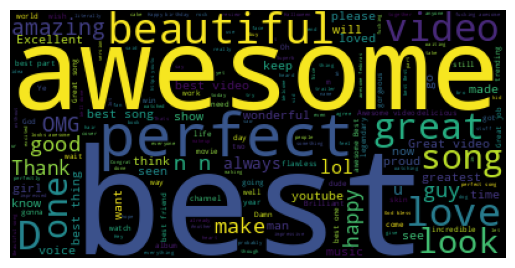

In [37]:
plt.imshow(wordcloud)
plt.axis('off')

In [38]:
### Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..

In [39]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [40]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

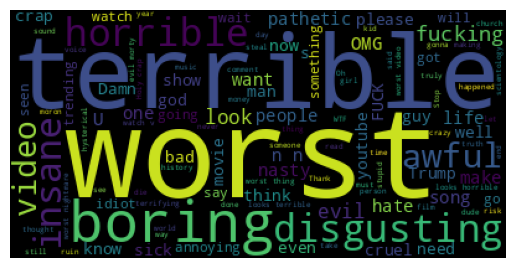

In [42]:
plt.imshow(wordcloud2)
plt.axis('off')

In [43]:
### Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

## 4.. Perform Emoji's Analysis

In [44]:
!pip install emoji==2.2.0 ## 2.2.0 is a most stable version till date , hence installing this version makes sense !

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=25c75e4a0925f89a0c08c3b48a69f5ba8dcb991f768842bde4b448f3bb8cc8cc
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [45]:
import emoji

In [46]:
emoji.__version__

'2.2.0'

In [47]:
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [ ]:
### lets extract emoji from below comment

In [48]:
comment = 'trending 😉'

In [49]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [50]:
## lets try to write above code in a more simpler & readable way :

In [51]:
emoji_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

In [52]:
emoji_list

['😉']

In [53]:
all_emojis_list = []

for comment in comments['comment_text'].dropna(): ## in case u have missing values , call dropna()
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [54]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [ ]:
### NOw we have to compute frequencies of each & every emoji in "all_emojis_list"..

In [55]:
from collections import Counter

In [56]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [57]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 36987)

In [58]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [59]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [60]:
Counter(all_emojis_list).most_common(10)[2][0]

'❤'

In [61]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [62]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [63]:
Counter(all_emojis_list).most_common(10)[1][1]

33453

In [64]:
Counter(all_emojis_list).most_common(10)[2][1]

31119

In [65]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [66]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [68]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [69]:
trace = go.Bar(x=emojis , y=freqs)

In [70]:
iplot([trace])

In [ ]:
## Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

## 5.. Collect Entire data of Youtube !

In [71]:
import os

In [82]:
import zipfile

file_path = '/content/additional_data-20240224T160458Z-001.zip'

# Open the ZIP file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # List the contents of the ZIP file
    files = zip_ref.namelist()

print(files)  # This will print a list of filenames contained within the ZIP file

['additional_data/USvideos.csv', 'additional_data/US_category_id.json', 'additional_data/RU_category_id.json', 'additional_data/MX_category_id.json', 'additional_data/MXvideos.csv', 'additional_data/KRvideos.csv', 'additional_data/KR_category_id.json', 'additional_data/JP_category_id.json', 'additional_data/RUvideos.csv', 'additional_data/IN_category_id.json', 'additional_data/GBvideos.csv', 'additional_data/GB_category_id.json', 'additional_data/FR_category_id.json', 'additional_data/DE_category_id.json', 'additional_data/CA_category_id.json', 'additional_data/CAvideos.csv', 'additional_data/JPvideos.csv', 'additional_data/INvideos.csv', 'additional_data/FRvideos.csv', 'additional_data/DEvideos.csv']


In [83]:
files

['additional_data/USvideos.csv',
 'additional_data/US_category_id.json',
 'additional_data/RU_category_id.json',
 'additional_data/MX_category_id.json',
 'additional_data/MXvideos.csv',
 'additional_data/KRvideos.csv',
 'additional_data/KR_category_id.json',
 'additional_data/JP_category_id.json',
 'additional_data/RUvideos.csv',
 'additional_data/IN_category_id.json',
 'additional_data/GBvideos.csv',
 'additional_data/GB_category_id.json',
 'additional_data/FR_category_id.json',
 'additional_data/DE_category_id.json',
 'additional_data/CA_category_id.json',
 'additional_data/CAvideos.csv',
 'additional_data/JPvideos.csv',
 'additional_data/INvideos.csv',
 'additional_data/FRvideos.csv',
 'additional_data/DEvideos.csv']

In [84]:
## extracting csv files only from above list ..

files_csv = [file for file in files if '.csv' in file]

In [ ]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [85]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### different types of encoding-->>
    Note : encoding may change depending upon data  , country data , sometimes regional data as well.
    Fore more inforation on Encoding -- Follow below
### https://docs.python.org/3/library/codecs.html#standard-encodings¶

In [93]:
import pandas as pd
import zipfile

# Define the path to the ZIP archive
zip_path = '/content/additional_data-20240224T160458Z-001.zip'

# Create an empty DataFrame to store the combined data
full_df = pd.DataFrame()

# Open the ZIP archive
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Get the list of files in the archive
    files_in_zip = zip_ref.namelist()

    # Iterate through each file in the archive
    for file_name in files_in_zip:
        # Check if the file is a CSV file
        if file_name.endswith('.csv'):
            # Read the CSV file into a DataFrame
            with zip_ref.open(file_name) as csv_file:
                current_df = pd.read_csv(csv_file, encoding='iso-8859-1', error_bad_lines=False)

                # Concatenate the current DataFrame with the full DataFrame
                full_df = pd.concat([full_df, current_df], ignore_index=True)

# Display the combined DataFrame
print(full_df)

           video_id trending_date  \
0       2kyS6SvSYSE      17.14.11   
1       1ZAPwfrtAFY      17.14.11   
2       5qpjK5DgCt4      17.14.11   
3       puqaWrEC7tY      17.14.11   
4       d380meD0W0M      17.14.11   
...             ...           ...   
375937  fn5WNxy-Wcw      18.14.06   
375938  zAFv43lxqHE      18.14.06   
375939  zSXG5I6Y2fA      18.14.06   
375940  5d115sePmaU      18.14.06   
375941  go-F6xvezAM      18.14.06   

                                                    title  \
0                      WE WANT TO TALK ABOUT OUR MARRIAGE   
1       The Trump Presidency: Last Week Tonight with J...   
2       Racist Superman | Rudy Mancuso, King Bach & Le...   
3                        Nickelback Lyrics: Real or Fake?   
4                                I Dare You: GOING BALD!?   
...                                                   ...   
375937  KINGDOM HEARTS III â E3 2018 Pirates of the ...   
375938                                     YMS: The Visit   
375939

In [94]:
full_df.shape

(375942, 16)

## 6.. How to export your data into (csv, json, db)

In [ ]:
### upto some extent your data is cleaned , so lets export this data into various formats for further analysis :

In [ ]:
'''

export your data into :
    a) csv
    b) json
    c) db


'''

In [95]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [ ]:
'''
default value of keep='first'

It means that the method will consider the first instance of a row to be unique and the remaining instances to be duplicates.


keep='first' (default): mark all rows as duplicates except for the first occurrence.

keep='last': mark all rows as duplicates except for the last occurrence.

keep=False: mark all rows as all duplicates.


'''

"\ndefault value of keep='first'\n\nIt means that the method will consider the first instance of a row to be unique and the remaining instances to be duplicates.\n\n\nkeep='first' (default): mark all rows as duplicates except for the first occurrence.\n\nkeep='last': mark all rows as duplicates except for the last occurrence.\n\nkeep=False: mark all rows as all duplicates.\n\n\n"

In [96]:
full_df = full_df.drop_duplicates() ## lets drop duplicate rows ..

In [98]:
full_df.shape

(339525, 16)

#### a... Storing data into csv ..

In [99]:
### you can consider sample of data depending on how efficient your system is..

full_df[0:1000].to_csv('/content/additional_data-20240224T160458Z-001.zip' , index=False)

#### b... Storing data into json

In [101]:
full_df[0:1000].to_json('/content/additional_data-20240224T160458Z-001.zip')

#### c... Storing data into database

In [102]:
#create engine allows us to connect to database
from sqlalchemy import create_engine

In [ ]:
# Lets create sql_alchemy engine by using create_engine method ie create engine allows us to connect to database
engine = create_engine(r'sqlite:///Z:\1.. Youtube\export_data/youtube_sample.sqlite')

In [ ]:
### we will store first 1000 rows into Users table..
full_df[0:1000].to_sql('Users' , con=engine , if_exists='append')

1000

In [ ]:
## As soon as u have u have your data into 'youtube_sample.sqlite' which has table has 'Users', now u can read data from this db file 'youtube_whole_data.sqlite' using sqlite3 & pandas

## 7.. Which Category has the maximum likes ?

In [103]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [104]:
full_df['category_id'].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43, 44,
       30])

In [117]:
## lets read json file ..
json_df = pd.read_json('/content/additional_data-20240224T160458Z-001.zip')

In [106]:
json_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,n1WpP7iowLc,17.18.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",26448434,911883,53873,127481,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
996,qrPPj3e2M-M,17.18.11,Darth Vader Mask Fail,Auralnauts,23,2017-11-13 16:39:05+00:00,"auralnauts|""auralnauts star wars""|""Darth Vader...",73984,3676,78,353,https://i.ytimg.com/vi/qrPPj3e2M-M/default.jpg,False,False,False,This is what happens when your James Earl Jone...
997,qK8AcryiniI,17.18.11,Donald Trump makes ASEAN handshake photo op go...,Rappler,25,2017-11-13 09:09:53+00:00,[none],67471,40,15,29,https://i.ytimg.com/vi/qK8AcryiniI/default.jpg,False,False,False,United States President Donald Trump was all f...
998,Lz7dya576HY,17.18.11,Why a New York Ice Cream Shop is Releasing Ham...,Eater,26,2017-11-13 15:00:03+00:00,"ham|""ice cream""|""candied""|""candy""|""pineapple""|...",35125,627,43,64,https://i.ytimg.com/vi/Lz7dya576HY/default.jpg,False,False,False,"In this episode of The Meat Show, Nick gets to..."


In [115]:
json_df['description'][0]

### each row of 'Items' feature is dictionary ..

"SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\\nCANDICE - https://www.lovebilly.com\\n\\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\\nwith this lens -- http://amzn.to/2rUJOmD\\nbig drone - http://tinyurl.com/h4ft3oy\\nOTHER GEAR ---  http://amzn.to/2o3GLX5\\nSony CAMERA http://amzn.to/2nOBmnv\\nOLD CAMERA; http://amzn.to/2o2cQBT\\nMAIN LENS; http://amzn.to/2od5gBJ\\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\\nWIDE LENS; http://tinyurl.com/jkfcm8t\\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\\nSMALL CAMERA; http://tinyurl.com/hrrzhor\\nMICROPHONE; http://tinyurl.com/zefm4jy\\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\\n\\nfollow me; on http://instagram.com/caseyneistat\\non https://www.facebook.com/cneistat\\non https://twit

In [118]:
json_df['description'][1]

"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\\n\\nConnect with Last Week Tonight online...\\n\\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\\n\\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\\n\\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\\n\\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight"

In [124]:
cat_dict = {}

for description in json_df['description'].values:
    ## cat_dict[key] = value (Syntax to insert key:value in dictionary)
    cat_dict[int(description['id'])] = description['snippet']['title']

TypeError: string indices must be integers

In [ ]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [110]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [111]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,NaN
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",NaN
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,NaN
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,NaN


ValueError: List of boxplot statistics and `positions` values must have same the length

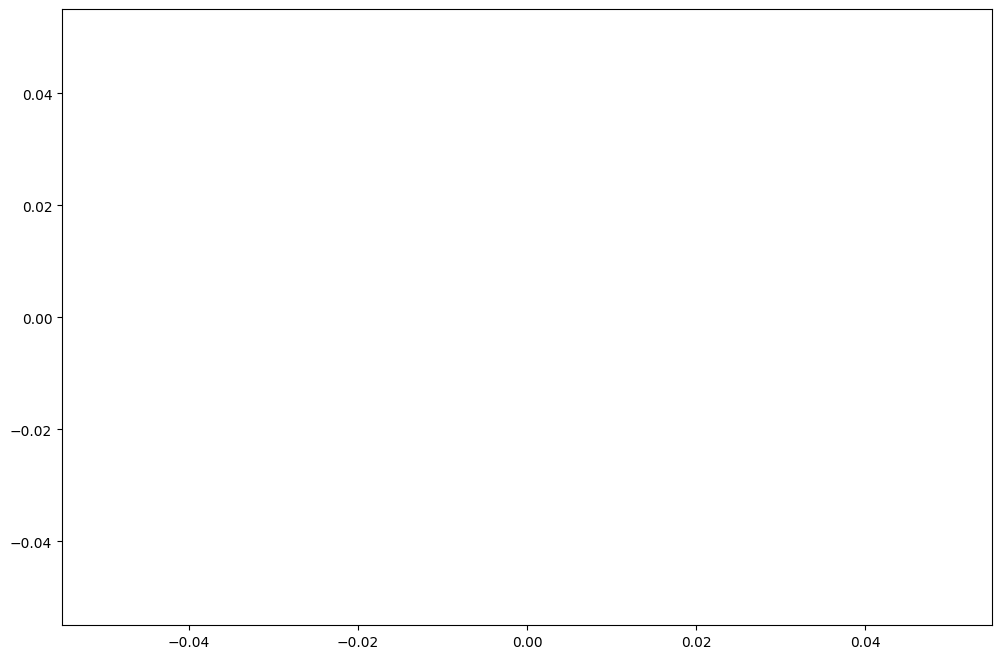

In [114]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')

## 8.. Find out whether audience is engaged or not

In [125]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [126]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

ValueError: List of boxplot statistics and `positions` values must have same the length

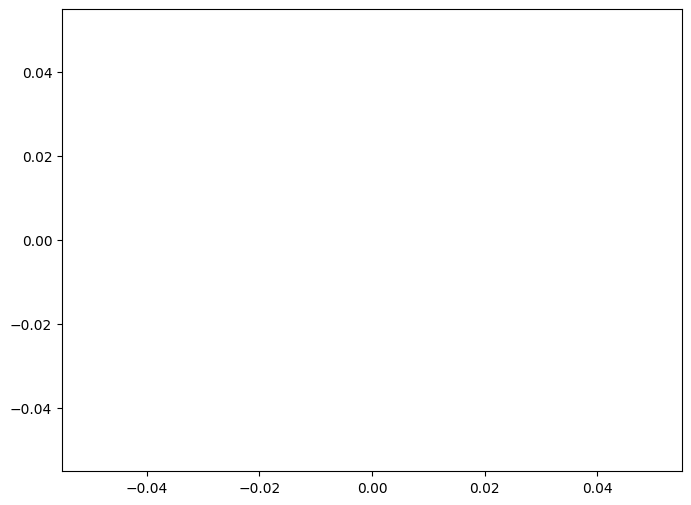

In [127]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name' , y='like_rate' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
### analysing relationship between views & likes

<AxesSubplot:xlabel='views', ylabel='likes'>

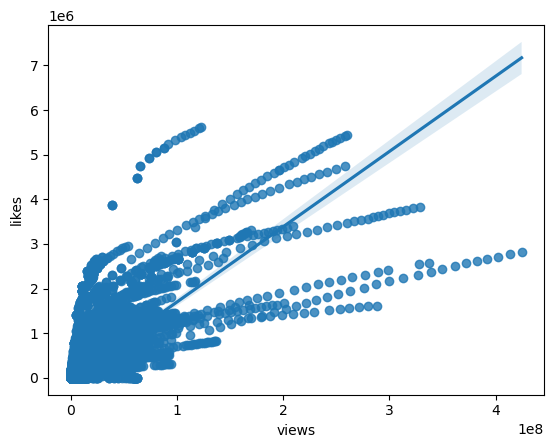

In [ ]:
sns.regplot(x='views' , y='likes' , data = full_df)

In [ ]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [ ]:
full_df[['views', 'likes', 'dislikes']].corr() ### finding co-relation values between ['views', 'likes', 'dislikes']

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<AxesSubplot:>

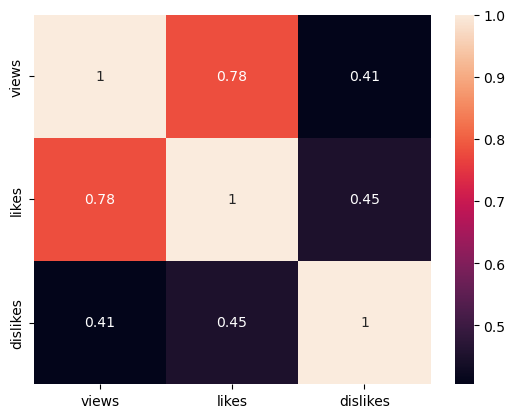

In [ ]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr() , annot=True)

## 9.. Which channels have the largest number of trending videos?

In [128]:
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,NaN,7.686932,0.396326,2.131822
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",NaN,4.017930,0.254095,0.525181
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,NaN,4.575780,0.167292,0.256342
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,NaN,2.964146,0.194074,0.625350
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,NaN,6.309732,0.094907,0.835890
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,NaN,8.191811,0.428763,1.203222


In [129]:
full_df['channel_title'].value_counts()

The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
paola musically                         1
ÐÐ Ð¥Ð¸Ð±ÐÐ½ÑÐ¾ÑÐ¼ÐÑÑÐ¾         1
Jonatan Seara                           1
Ebubekir Ekici                          1
ÅÄ
czy nas piÅka                      1
Name: channel_title, Length: 37824, dtype: int64

In [ ]:
### lets obtain above frequency table using groupby approach :

In [130]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [131]:
cdf = cdf.rename(columns={0:'total_videos'})

In [132]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [133]:
import plotly.express as px

In [134]:
px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')

## 10.. Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [135]:
full_df['title'][0]

'WE WANT TO TALK ABOUT OUR MARRIAGE'

In [136]:
import string

In [137]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [138]:
len([char for char in full_df['title'][0] if char in string.punctuation])

0

In [139]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [140]:
sample = full_df[0:10000]

In [141]:
sample['count_punc'] = sample['title'].apply(punc_count)

In [142]:
sample['count_punc']

0       0
1       3
2       3
3       2
4       3
       ..
9995    0
9996    2
9997    2
9998    2
9999    0
Name: count_punc, Length: 10000, dtype: int64

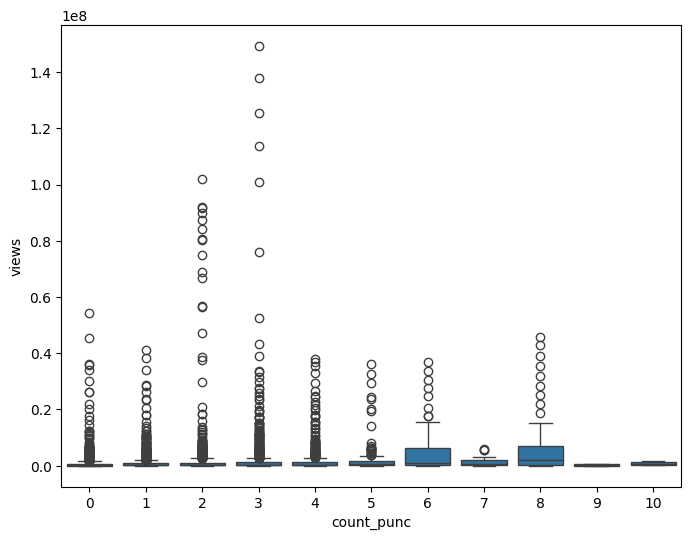

In [143]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='views' , data=sample)
plt.show()

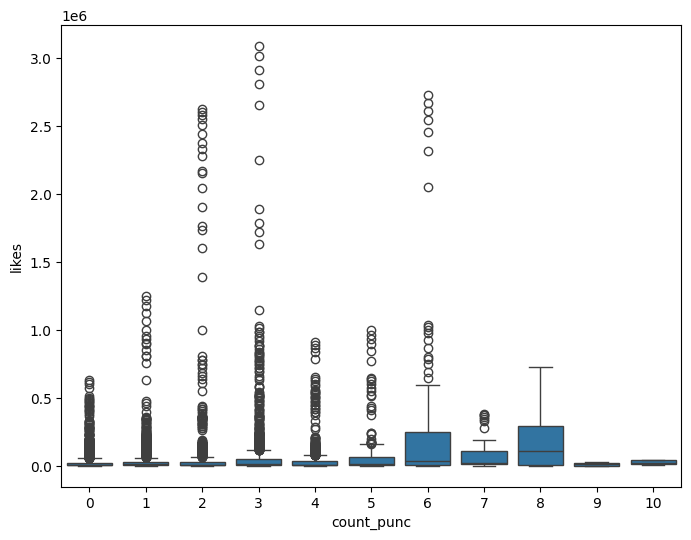

In [144]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='likes' , data=sample)
plt.show()